In [1]:
import numpy as np
import matcomp_algorithms as mca
from numpy.testing import assert_almost_equal as aae

In [2]:
import matplotlib.pyplot as plt

In [3]:
#np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

## Create synthetic data

In [4]:
np.random.seed(6)
M = 13
N = 10

In [5]:
A = np.round(np.random.rand(M,N), decimals=3)

In [6]:
x_true = np.random.rand(N) + 1

In [7]:
y = np.dot(A, x_true)

In [8]:
print(A)

[[0.893 0.332 0.821 0.042 0.108 0.595 0.53  0.419 0.335 0.623]
 [0.438 0.736 0.518 0.579 0.645 0.99  0.82  0.413 0.876 0.824]
 [0.054 0.719 0.802 0.736 0.709 0.541 0.125 0.958 0.403 0.217]
 [0.717 0.994 0.256 0.671 0.599 0.717 0.937 0.352 0.254 0.402]
 [0.747 0.724 0.406 0.989 0.45  0.374 0.71  0.082 0.398 0.771]
 [0.765 0.284 0.19  0.471 0.335 0.735 0.189 0.331 0.844 0.615]
 [0.885 0.977 0.837 0.181 0.618 0.476 0.404 0.742 0.826 0.683]
 [0.139 0.703 0.059 0.193 0.925 0.405 0.148 0.682 0.163 0.648]
 [0.252 0.041 0.959 0.066 0.513 0.341 0.66  0.844 0.604 0.587]
 [0.117 0.71  0.205 0.49  0.037 0.315 0.863 0.558 0.547 0.368]
 [0.828 0.276 0.126 0.563 0.267 0.775 0.179 0.783 0.608 0.042]
 [0.561 0.668 0.938 0.786 0.75  0.497 0.043 0.817 0.014 0.55 ]
 [0.567 0.113 0.063 0.575 0.485 0.301 0.04  0.634 0.124 0.012]]


In [9]:
print(x_true)

[1.27666659 1.30154554 1.18031763 1.06697796 1.77923395 1.40074847
 1.24581485 1.52377219 1.25498569 1.85190846]


In [10]:
print(y)

[6.48453444 9.55687528 7.27906754 8.06423743 7.69175788 6.63664858
 9.28425148 6.20929578 6.9212139  5.63870165 5.98329659 7.89663382
 4.03711599]


## Householder QR

In [11]:
A2 = A.copy()
mca.QR_House(A2)

In [12]:
Q = mca.Q_from_QR_House(A=A2)
R = np.triu(A2)

In [13]:
np.allclose(A, np.dot(Q, R))

True

In [14]:
A.shape

(13, 10)

In [15]:
Q.shape

(13, 13)

In [16]:
R.shape

(13, 10)

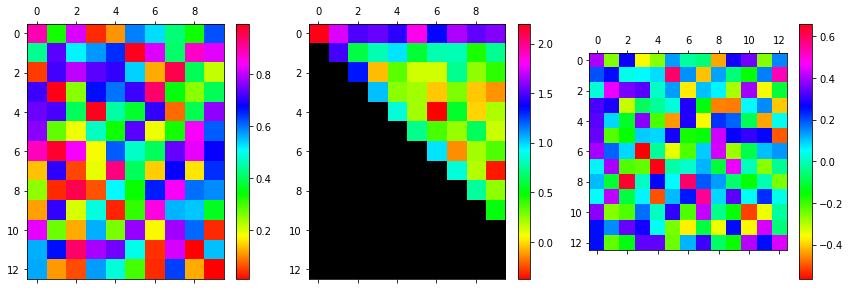

In [17]:
cmap = plt.cm.hsv
cmap.set_bad(color='black')

plt.figure(figsize=(12,4))

plt.subplot(131)
#plt.matshow(A, fignum=0, cmap='jet')
A_masked = np.ma.masked_where(A == 0, A)
plt.matshow(A_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(132)
#plt.matshow(R, fignum=0, cmap='jet')
R_masked = np.ma.masked_where(R == 0, R)
plt.matshow(R_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.subplot(133)
#plt.matshow(Q, fignum=0, cmap='jet')
Q_masked = np.ma.masked_where(Q == 0, Q)
plt.matshow(Q_masked, fignum=0, cmap=cmap)
plt.colorbar()

plt.tight_layout()
plt.show()

## LS solution via QR decomposition

In [18]:
QTy = np.dot(Q.T,y)
c = QTy[:N]
minimum_residual_size = np.linalg.norm(QTy[N:])

In [19]:
x_house_qr = np.linalg.solve(R[:N], c)

In [20]:
print(x_true)

[1.27666659 1.30154554 1.18031763 1.06697796 1.77923395 1.40074847
 1.24581485 1.52377219 1.25498569 1.85190846]


In [21]:
print(x_house_qr)

[1.27666659 1.30154554 1.18031763 1.06697796 1.77923395 1.40074847
 1.24581485 1.52377219 1.25498569 1.85190846]


In [22]:
print(minimum_residual_size)

5.551115123125783e-15
